In [8]:
import pandas as pd

df = pd.read_csv('/Volumes/Macintosh HD/AnalyticsVidhya/av-gt-food_demand_forecast/inst/extdata/train.csv')

df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [33]:
df_elt = df[['week', 'center_id', 'meal_id', 'num_orders']]
df_elt = df_elt[(df_elt['center_id']==55) & (df_elt['meal_id']==1885)]

date = pd.date_range(
    start='1/1/2010',
    periods=145,
    freq='ME'
)
pd_date = pd.DataFrame({'ds':date, 'week':pd.RangeIndex(1,146).to_series()})

df_master = df_elt.merge(pd_date, on='week')


In [9]:
from nixtla import NixtlaClient

In [10]:
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-BMLzdE6eCpynj4IoTctTutxujAhphTL7dzPvhnj1zmxj3jGqyIamzqKPOjRWZ4g0qWbrhpVgQwBY1hvE'
)

In [11]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

Fontconfig warning: ignoring UTF-8: not a valid region tag
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
INFO:matplotlib.font_manager:Failed to extract font properties from /opt/X11/share/system_fonts/LastResort.otf: tuple indices must be integers or slices, not str
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
INFO:matplotlib.font_manager:Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
INFO:matplotlib.font_manager:Failed to extract font properties from /opt/X11/share/system_fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
INFO:matplotlib.font_manager:generated new

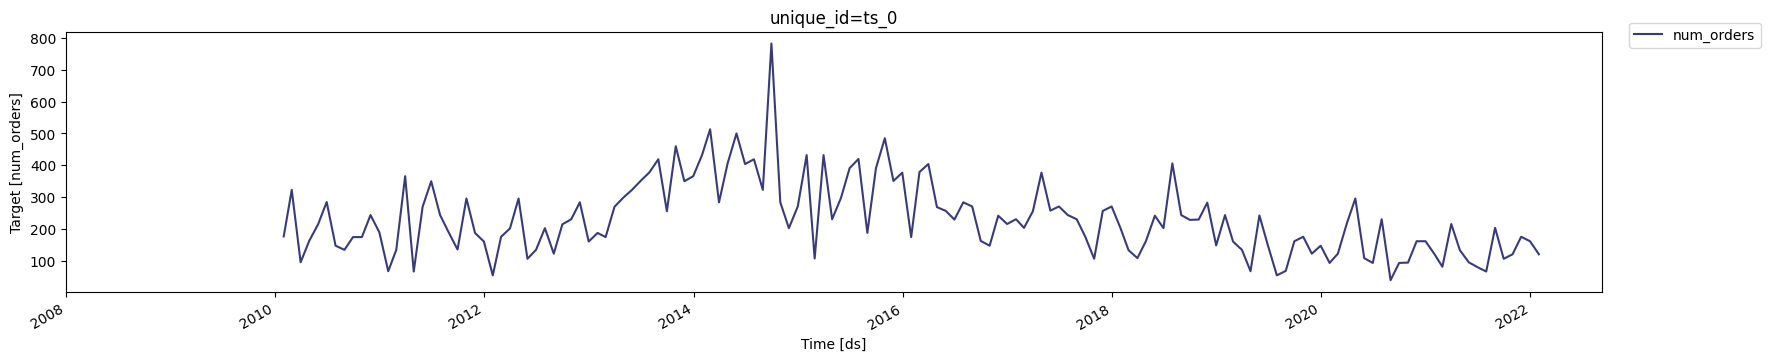

In [35]:
nixtla_client.plot(df_master, time_col='ds', target_col='num_orders')